In [53]:
# ==============================
# Cell 1: Import Libraries
# ==============================
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [54]:
# ==============================
# Cell 2: Config
# ==============================
# กลุ่มหุ้น Magnificent Seven
TICKERS = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA"]

# ระยะเวลาในการดึงข้อมูล
START = "2023-01-01"
END   = "2025-01-01"

In [55]:
# ==============================
# Cell 3: Fetch Data
# ==============================
data = {}
for t in TICKERS:
    df = yf.download(t, start=START, end=END, auto_adjust=False)  # ❗ False → เก็บ Price + Adj Close
    if not df.empty:
        df["Daily Return"] = df["Adj Close"].pct_change()
        data[t] = df
    else:
        print(f"⚠️ Warning: No data for {t}")

# รวมเป็น MultiIndex DataFrame
multi_df = pd.concat({t: data[t] for t in data.keys()}, axis=1)
display(multi_df.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL                                                  \
Price        Adj Close       Close        High         Low        Open   
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.330650  125.070000  130.899994  124.169998  130.279999   
2023-01-04  124.602707  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.281349  125.019997  127.769997  124.760002  127.129997   
2023-01-06  127.817375  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.339996  130.149994  133.410004  129.889999  130.470001   

                                          MSFT                          ...  \
Price          Volume Daily Return   Adj Close       Close        High  ...   
Ticker           AAPL                     MSFT        MSFT        MSFT  ...   
Date                                                                    ...   
2023-01-03  112117500          NaN  234.423569  239.580002  245.750000  ...   
2023-01-04   89113600     0.010314  224.169159  229.100006  232.869995  ...   
2023-01-05   80962700    -0.010605  217.525269  222.309998  227.550003  ...   
2023-01-06   87754700     0.036794  220.088913  224.929993  225.759995  ...   
2023-01-09   70790800     0.004089  222.231750  227.119995  231.240005  ...   

                  TSLA                               NVDA                  \
Price             Open     Volume Daily Return  Adj Close   Close    High   
Ticker            TSLA       TSLA                    NVDA    NVDA    NVDA   
Date                                                                        
2023-01-03  118.470001  231402800          NaN  14.302286  14.315  14.996   
2023-01-04  109.110001  180389000     0.051249  14.735902  14.749  14.853   
2023-01-05  110.510002  157986300    -0.029039  14.252332  14.265  14.564   
2023-01-06  103.000000  220911100     0.024651  14.845804  14.859  15.010   
2023-01-09  118.959999  190284000     0.059349  15.614120  15.628  16.056   

                                                    
Price          Low    Open     Volume Daily Return  
Ticker        NVDA    NVDA       NVDA               
Date                                                
2023-01-03  14.096  14.851  401277000          NaN  
2023-01-04  14.241  14.567  431324000     0.030318  
2023-01-05  14.148  14.491  389168000    -0.032816  
2023-01-06  14.034  14.474  405044000     0.041640  
2023-01-09  15.141  15.284  504231000     0.051753  

[5 rows x 49 columns]

In [56]:
# ==============================
# Cell 4: ตรวจสอบ Missing Values
# ==============================
print("📌 Missing Values ของแต่ละหุ้น (ก่อน Preprocessing):")
for t in data.keys():
    print(f"\n{t}:\n", data[t].isna().sum())


📌 Missing Values ของแต่ละหุ้น (ก่อน Preprocessing):

AAPL:
 Price         Ticker
Adj Close     AAPL      0
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
Daily Return            1
dtype: int64

MSFT:
 Price         Ticker
Adj Close     MSFT      0
Close         MSFT      0
High          MSFT      0
Low           MSFT      0
Open          MSFT      0
Volume        MSFT      0
Daily Return            1
dtype: int64

GOOGL:
 Price         Ticker
Adj Close     GOOGL     0
Close         GOOGL     0
High          GOOGL     0
Low           GOOGL     0
Open          GOOGL     0
Volume        GOOGL     0
Daily Return            1
dtype: int64

AMZN:
 Price         Ticker
Adj Close     AMZN      0
Close         AMZN      0
High          AMZN      0
Low           AMZN      0
Open          AMZN      0
Volume        AMZN      0
Daily Return            1
dtype: int64

META:
 Price         Ticker
Adj Close     META    

In [57]:
# ==============================
# Cell 5: Preprocess (ลบ NaN + Volatility)
# ==============================
for t in data.keys():
    df = data[t].copy()
    
    # ลบ NaN
    df = df.dropna()
    
    # เพิ่ม Volatility (ใช้ Daily Return 30 วัน)
    df["Volatility"] = df["Daily Return"].rolling(window=30).std()
    
    # ลบ NaN ที่เกิดจาก rolling
    df = df.dropna()
    
    data[t] = df

# รวมใหม่หลัง Preprocess
multi_df = pd.concat({t: data[t] for t in data.keys()}, axis=1)
display(multi_df.head())


AAPL                                                  \
Price        Adj Close       Close        High         Low        Open   
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-02-15  153.403717  155.330002  155.500000  152.880005  153.110001   
2023-02-16  151.803772  153.710007  156.330002  153.350006  153.509995   
2023-02-17  150.658157  152.550003  153.000000  150.850006  152.350006   
2023-02-21  146.638611  148.479996  151.300003  148.410004  150.199997   
2023-02-22  147.063324  148.910004  149.949997  147.160004  148.869995   

                                                    MSFT              ...  \
Price         Volume Daily Return Volatility   Adj Close       Close  ...   
Ticker          AAPL                                MSFT        MSFT  ...   
Date                                                                  ...   
2023-02-15  65573800     0.013904   0.014632  264.183563  269.320007  ...   
2023-02-16  68167900    -0.010430   0.014976  257.150330  262.149994  ...   
2023-02-17  59144100    -0.007547   0.014864  253.138275  258.059998  ...   
2023-02-21  58867200    -0.026680   0.014966  247.851074  252.669998  ...   
2023-02-22  51011300     0.002896   0.014970  246.713196  251.509995  ...   

                   TSLA                  NVDA                        \
Price      Daily Return Volatility  Adj Close      Close       High   
Ticker                                   NVDA       NVDA       NVDA   
Date                                                                  
2023-02-15     0.023847   0.041914  22.743782  22.764000  22.855000   
2023-02-16    -0.056946   0.044077  21.982462  22.002001  22.549999   
2023-02-17     0.031033   0.043113  21.369003  21.388000  21.740000   
2023-02-21    -0.052518   0.045218  20.636658  20.655001  21.493999   
2023-02-22     0.017683   0.044594  20.735569  20.754000  21.104000   

                                                                     
Price             Low       Open     Volume Daily Return Volatility  
Ticker           NVDA       NVDA       NVDA                          
Date                                                                 
2023-02-15  22.106001  22.549000  420575000    -0.009011   0.034953  
2023-02-16  21.927000  22.132999  412026000    -0.033474   0.035988  
2023-02-17  20.975000  21.631001  465888000    -0.027907   0.035778  
2023-02-21  20.618000  21.000000  410015000    -0.034271   0.036449  
2023-02-22  20.421000  20.707001  513184000     0.004793   0.035668  

[5 rows x 56 columns]

In [58]:
# ==============================
# Cell 6: Scaling (ทุกหุ้น)
# ==============================
scaled_data = {}

for ticker in data.keys():
    scaler = MinMaxScaler(feature_range=(0,1))
    
    # เลือกเฉพาะคอลัมน์ที่ใช้จริง
    features = ["Open","High","Low","Close","Adj Close","Volume","Daily Return","Volatility"]
    df_scaled = scaler.fit_transform(data[ticker][features])
    
    scaled_df = pd.DataFrame(df_scaled, columns=features, index=data[ticker].index)
    scaled_data[ticker] = scaled_df
    
    print(f"\n📌 Data หลัง Scaling ของ {ticker}:")
    display(scaled_df.head())



📌 Data หลัง Scaling ของ AAPL:


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Volatility
Date,,,,,,,,
2023-02-15,0.076707,0.077520,0.078959,0.088119,0.086354,0.143306,0.513762,0.528208
2023-02-16,0.080221,0.084840,0.083092,0.073872,0.072392,0.152086,0.312353,0.555235
2023-02-17,0.070029,0.055472,0.061110,0.063671,0.062395,0.121543,0.336216,0.546435
2023-02-21,0.051138,0.040480,0.039655,0.027878,0.027319,0.120606,0.177849,0.554490
2023-02-22,0.039452,0.028574,0.028664,0.031660,0.031025,0.094016,0.422653,0.554746



📌 Data หลัง Scaling ของ MSFT:


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Volatility
Date,,,,,,,,
2023-02-15,0.098753,0.091068,0.093991,0.104162,0.102001,0.304998,0.395113,1.000000
2023-02-16,0.079247,0.072716,0.074435,0.071761,0.070273,0.314547,0.254998,0.921360
2023-02-17,0.058245,0.042130,0.047475,0.053278,0.052173,0.320105,0.337883,0.874500
2023-02-21,0.035972,0.020973,0.027325,0.028921,0.028321,0.297639,0.298138,0.911183
2023-02-22,0.034203,0.015684,0.021613,0.023679,0.023188,0.214845,0.420696,0.913508



📌 Data หลัง Scaling ของ GOOGL:


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Volatility
Date,,,,,,,,
2023-02-15,0.047813,0.064826,0.052350,0.072631,0.072153,0.538649,0.602844,0.983872
2023-02-16,0.055967,0.069847,0.057895,0.059332,0.058942,0.434683,0.407132,0.986678
2023-02-17,0.051149,0.050838,0.043515,0.048545,0.048225,0.324348,0.420338,0.976419
2023-02-21,0.034007,0.028781,0.029511,0.024737,0.024574,0.315514,0.344390,0.998176
2023-02-22,0.021961,0.019905,0.019079,0.023435,0.023281,0.278478,0.474156,0.997567



📌 Data หลัง Scaling ของ AMZN:


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Volatility
Date,,,,,,,,
2023-02-15,0.064036,0.063508,0.073844,0.073347,0.073347,0.238560,0.600978,0.971003
2023-02-16,0.064879,0.059672,0.071342,0.052180,0.052180,0.299243,0.340636,1.000000
2023-02-17,0.054978,0.040563,0.053828,0.045499,0.045499,0.325960,0.458354,0.983149
2023-02-21,0.037705,0.024011,0.043963,0.027075,0.027075,0.300989,0.357055,0.984144
2023-02-22,0.036020,0.033956,0.047752,0.035584,0.035584,0.322374,0.590127,0.982979



📌 Data หลัง Scaling ของ META:


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Volatility
Date,,,,,,,,
2023-02-15,0.016809,0.015972,0.016690,0.016453,0.016386,0.257345,0.300162,0.950135
2023-02-16,0.008880,0.010969,0.008987,0.006262,0.006236,0.263829,0.255742,0.964130
2023-02-17,0.003414,0.005260,0.004439,0.007212,0.007182,0.243121,0.350286,0.962761
2023-02-21,0.012250,0.015930,0.009183,0.005484,0.005462,0.373418,0.327037,0.963353
2023-02-22,0.005250,0.004362,0.004417,0.003411,0.003398,0.221390,0.323956,0.963761



📌 Data หลัง Scaling ของ TSLA:


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Volatility
Date,,,,,,,,
2023-02-15,0.212322,0.204069,0.211195,0.213700,0.213700,0.695875,0.429715,0.540131
2023-02-16,0.209399,0.212758,0.197797,0.177585,0.177585,0.930900,0.193849,0.593973
2023-02-17,0.177223,0.185992,0.184180,0.196146,0.196146,0.854229,0.450695,0.569985
2023-02-21,0.192133,0.189683,0.183301,0.163761,0.163761,0.691096,0.206776,0.622358
2023-02-22,0.171080,0.167248,0.166233,0.174092,0.174092,0.748231,0.411719,0.606837



📌 Data หลัง Scaling ของ NVDA:


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Volatility
Date,,,,,,,,
2023-02-15,0.014319,0.013287,0.013390,0.016448,0.016435,0.219230,0.264834,0.526490
2023-02-16,0.011085,0.010972,0.011968,0.010505,0.010497,0.213288,0.193669,0.556238
2023-02-17,0.007183,0.004826,0.004402,0.005717,0.005712,0.250725,0.209864,0.550204
2023-02-21,0.002278,0.002959,0.001565,0.000000,0.000000,0.211890,0.191348,0.569495
2023-02-22,0.000000,0.000000,0.000000,0.000772,0.000771,0.283597,0.304993,0.547053


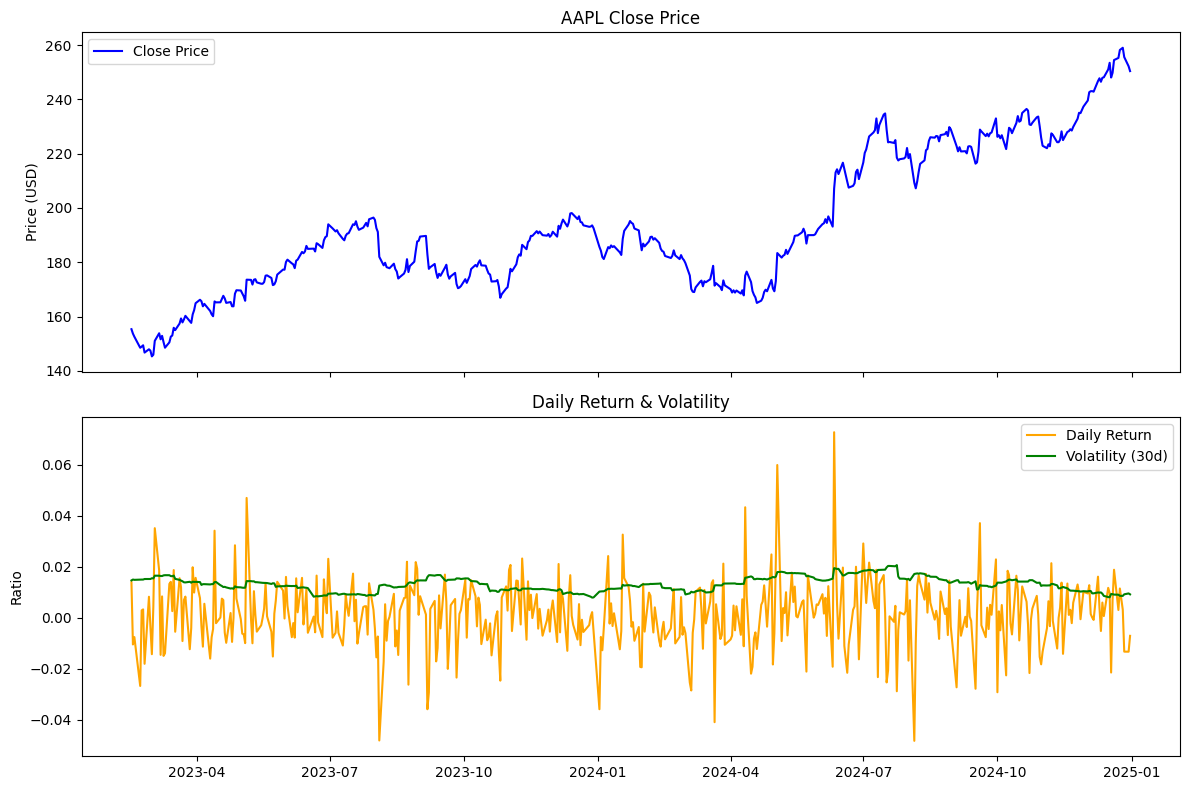

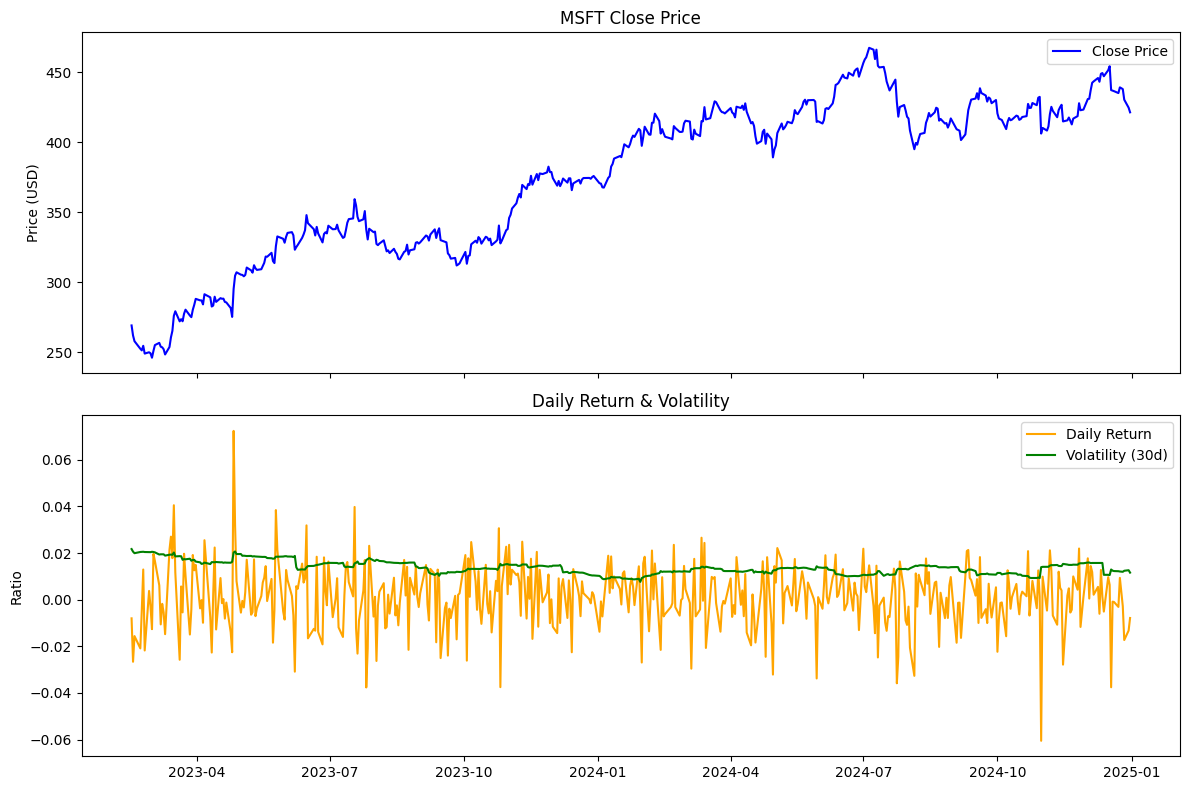

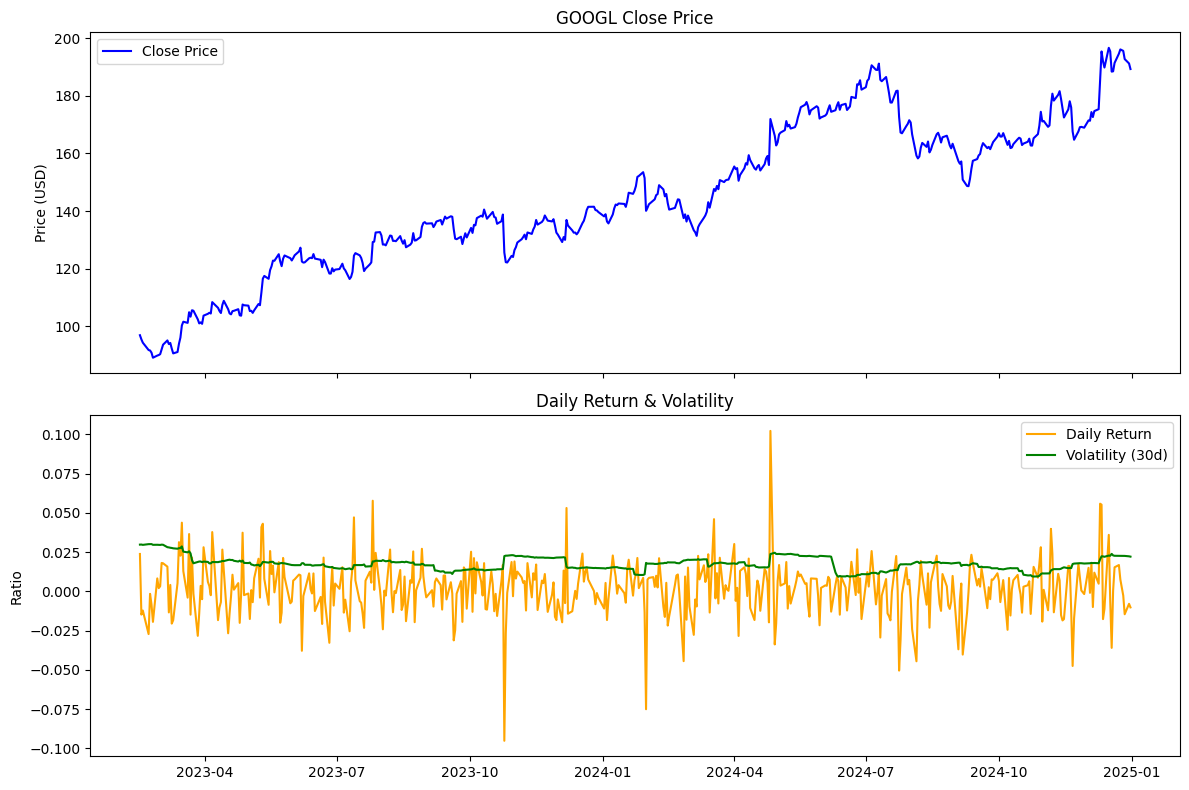

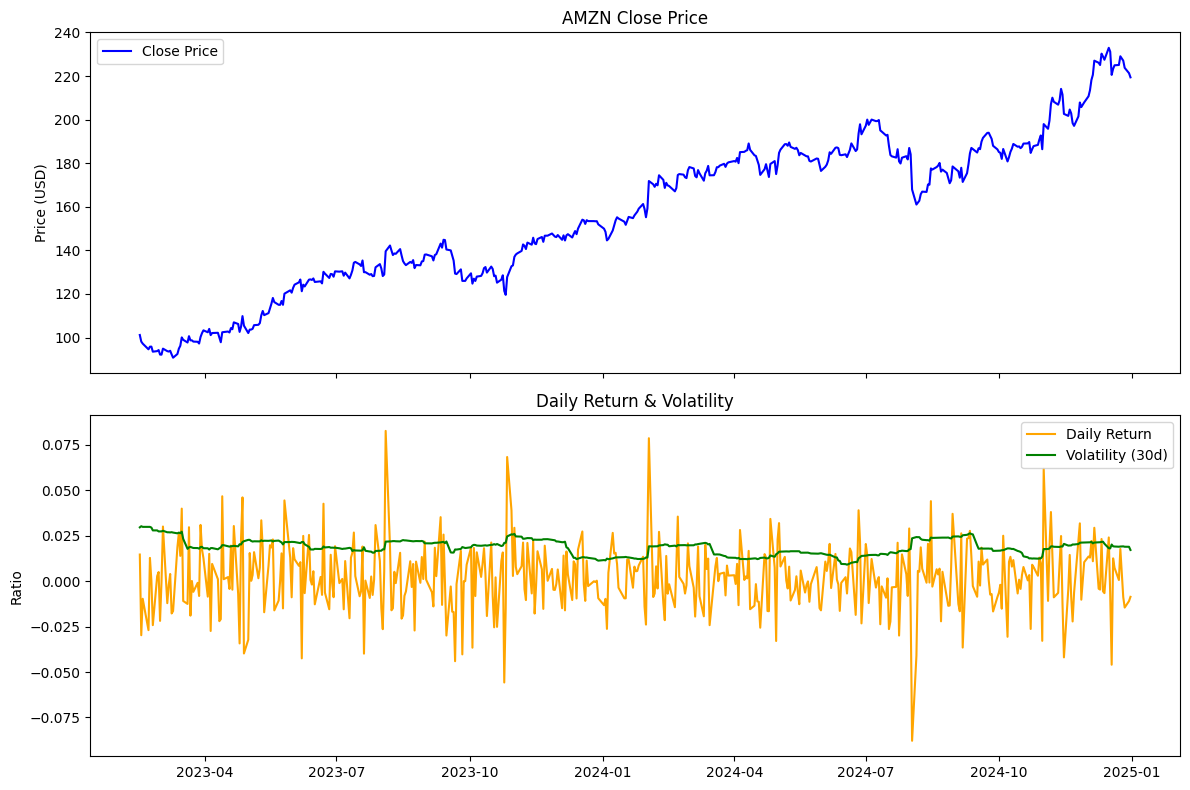

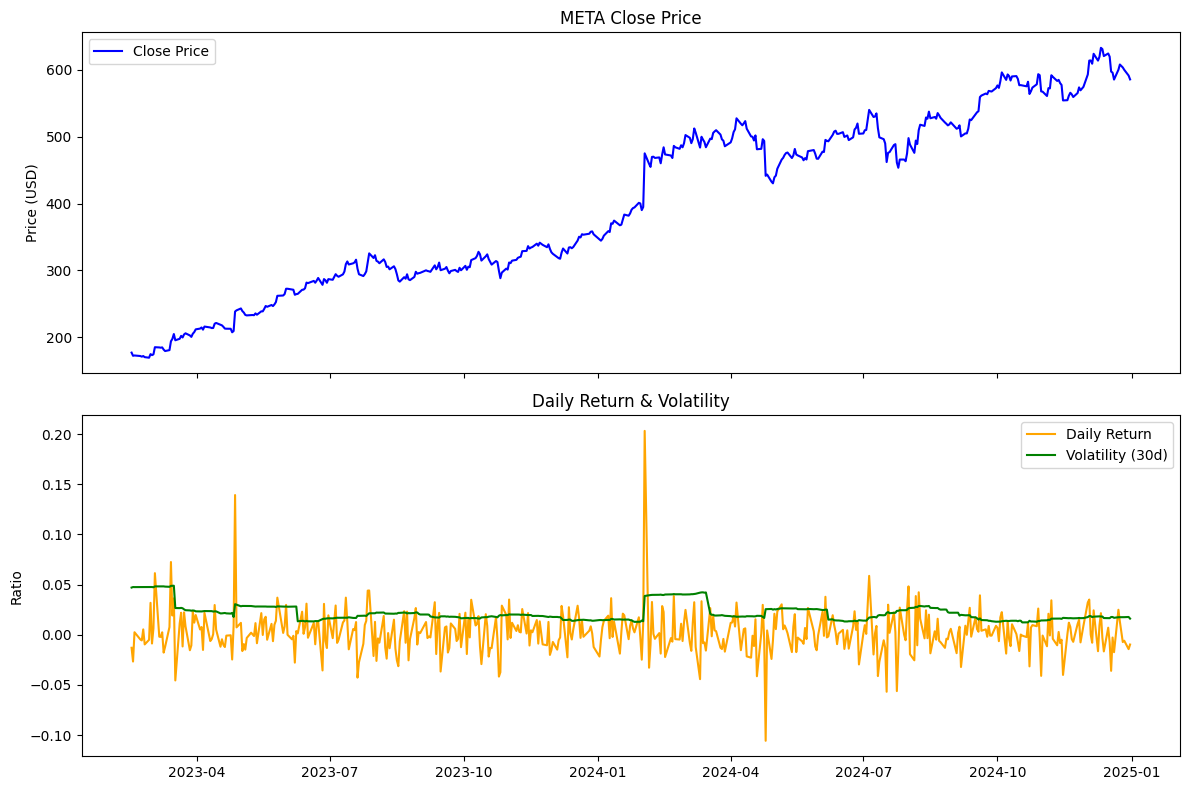

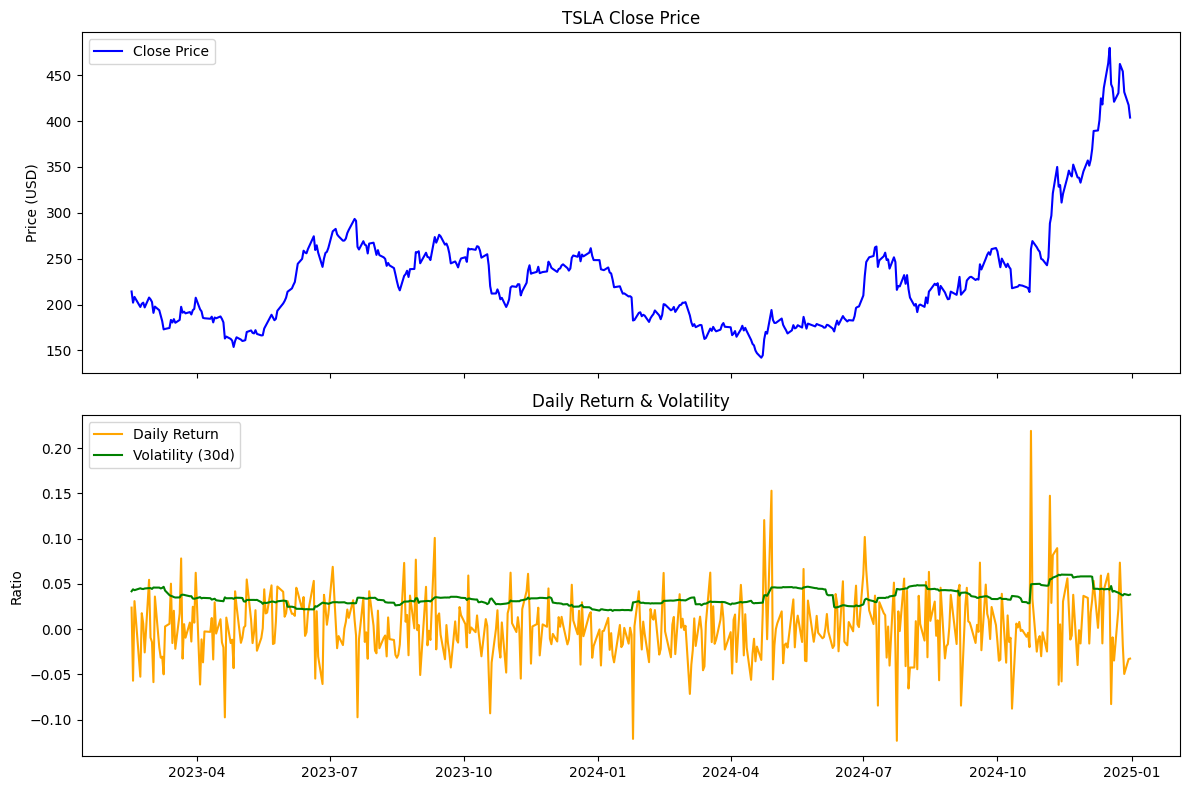

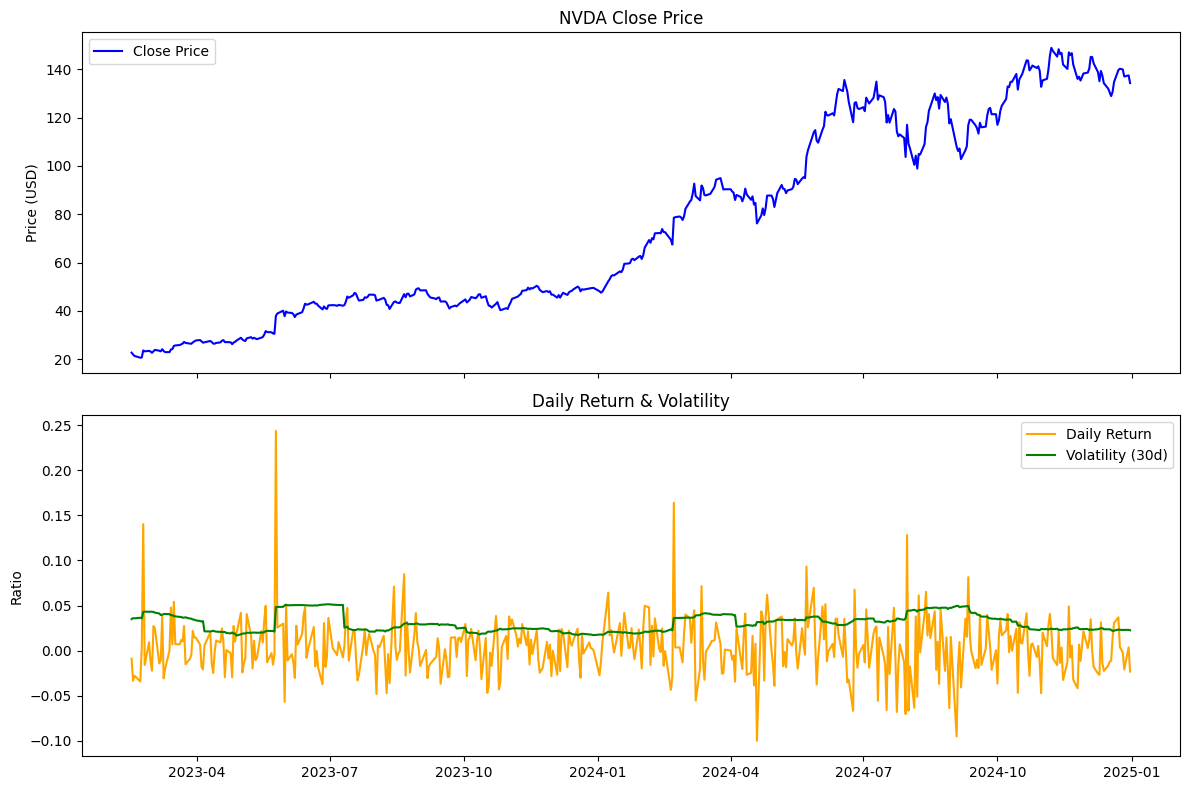

In [59]:
# ==============================
# Cell 7: Visualization (ทุกหุ้น)
# ==============================
for ticker in data.keys():
    df = data[ticker]

    fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

    # Plot Close Price
    axes[0].plot(df["Close"], label="Close Price", color="blue")
    axes[0].set_title(f"{ticker} Close Price")
    axes[0].set_ylabel("Price (USD)")
    axes[0].legend()

    # Plot Daily Return + Volatility
    axes[1].plot(df["Daily Return"], label="Daily Return", color="orange")
    axes[1].plot(df["Volatility"], label="Volatility (30d)", color="green")
    axes[1].set_title("Daily Return & Volatility")
    axes[1].set_ylabel("Ratio")
    axes[1].legend()

    plt.tight_layout()
    plt.show()
